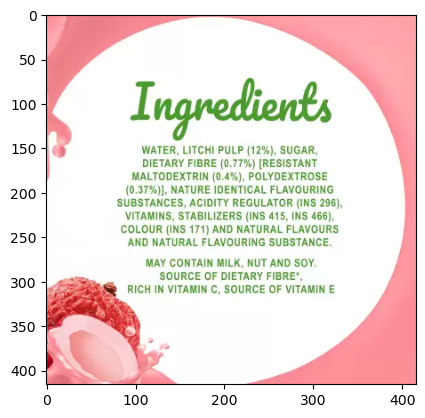

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



Grouped Text in Image Format:
Ingnedienes
WATER, Litchi PULP (129/, SUGAR,
DIETARY FIBRE (0.770) [RESISTANT
MALTODEXTRIN 4%) , POLYDEXTROSE
3791] , NATURE IDENTICAL FLAVOURING
SUBSTANCES, Acidity REGULATOR (InS 296),
VITAMINS STABILIZERS (INS 415, INS 466),
COLOUR (INS 171) AND NATURAL FLAVOURS
AND NATURAL FLAVOURING SUBSTANCE
MaY contain MiLK; NuT AND SOY:
SOURCE OF DIETARY FIBRE:
RICH IN VITAMIN SOURCE OF VITAMIN


In [15]:
import cv2
import matplotlib.pyplot as plt
import easyocr

# Load the image
image = cv2.imread(r'C:\Users\lenovo\Desktop\images\-original-imah526rfzkrzht6.webp')

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Initialize the OCR reader
reader = easyocr.Reader(lang_list=['en'], gpu=True)

# Read the text in the image
try:
    results = reader.readtext(image)
except Exception as e:
    print(f"An error occurred while reading the text: {e}")
    results = []

# Group text by similar y-coordinates (to maintain format)
def group_text_by_lines(results, y_threshold=10):
    """
    Group text results by similar y-coordinates to keep the text in the same horizontal line together.
    """
    grouped_text = []
    current_line = []
    previous_y = None

    for result in results:
        bbox, text, _ = result
        # Get the top-left corner y-coordinate of the bounding box
        top_left_y = bbox[0][1]

        if previous_y is None:
            current_line.append(text)
            previous_y = top_left_y
        else:
            # If the current box is vertically close to the previous one, group them in the same line
            if abs(top_left_y - previous_y) <= y_threshold:
                current_line.append(text)
            else:
                # Append the current line to the result and start a new line
                grouped_text.append(" ".join(current_line))
                current_line = [text]

            # Update the previous_y to the current one
            previous_y = top_left_y

    # Append the last line
    if current_line:
        grouped_text.append(" ".join(current_line))

    return grouped_text

# Get the grouped text
grouped_results = group_text_by_lines(results)

# Print the grouped text
print("\nGrouped Text in Image Format:")
for line in grouped_results:
    print(line)
